# **Deep Learning Programming with Python**
### Week6: Recurrent Neural Network (RNNs)

**Acknowledgement**

Many of Today's contents are adopted from the below resources:

1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.tensorflow.org/guide/keras/rnn
3. https://www.kaggle.com/mczielinski/bitcoin-historical-data
4. IT CookBook, 파이썬으로 만드는 인공지능 | 한및아카데미 | 오일석, 이진선

---

## Korean Composite Stock Price Indexes (KOSPI) Prediction
### 1. Get the data
#### KOSPI Historical Data
#### Export the historical kospi data from

https://finance.yahoo.com/quote/%5EKS11/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAILtHsFgd6hIiD4A-MKjjRt2yQjLd6EyL0QkAWGvetqzg590nTyt3Kop28GTiVqbafn6IPrOonmhw8UVQdHq30iICfFtiqjMXXOpMVVVNZ7VNoFx3qYZBL0DmTAk1ncne3kQUML14DZB831YKM9bltp2ATW4KkO-Y-K6ANvRfKRZ

To upload from your local drive, start with the following code:

In [4]:
from google.colab import files
uploaded = files.upload()

Saving KS11.csv to KS11 (1).csv


In [5]:
!ls -al
!pwd

total 532
drwxr-xr-x 1 root root   4096 Jun 20 15:43  .
drwxr-xr-x 1 root root   4096 Jun 20 15:37  ..
drwxr-xr-x 4 root root   4096 Jun 14 18:26  .config
-rw-r--r-- 1 root root 505492 Jun 20 15:43 'KS11 (1).csv'
-rw-r--r-- 1 root root  19387 Jun 20 15:38  KS11.csv
drwxr-xr-x 1 root root   4096 Jun 14 18:27  sample_data
/content


data length: 6537
The first 20 data:
 [[705.98999  709.47998  704.429993 704.679993]
 [705.109985 706.01001  688.73999  689.380005]
 [690.440002 695.719971 677.640015 689.070007]
 [686.969971 686.969971 667.710022 673.919983]
 [675.349976 680.090027 660.390015 663.349976]
 [662.070007 671.429993 655.469971 661.390015]
 [668.130005 690.969971 668.130005 690.969971]
 [695.330017 703.51001  692.469971 700.869995]
 [691.97998  697.119995 684.809998 684.809998]
 [683.109985 687.059998 677.559998 677.76001 ]
 [676.210022 676.210022 655.23999  659.01001 ]
 [654.820007 657.039978 643.570007 651.219971]
 [647.669983 655.700012 635.409973 653.789978]
 [637.97998  637.97998  625.01001  626.869995]
 [622.450012 627.609985 609.119995 611.049988]
 [608.530029 623.390015 600.559998 621.409973]
 [619.099976 640.809998 612.409973 639.869995]
 [637.98999  653.590027 636.809998 648.690002]
 [659.809998 664.950012 655.73999  659.539978]
 [656.669983 687.659973 656.669983 686.590027]]


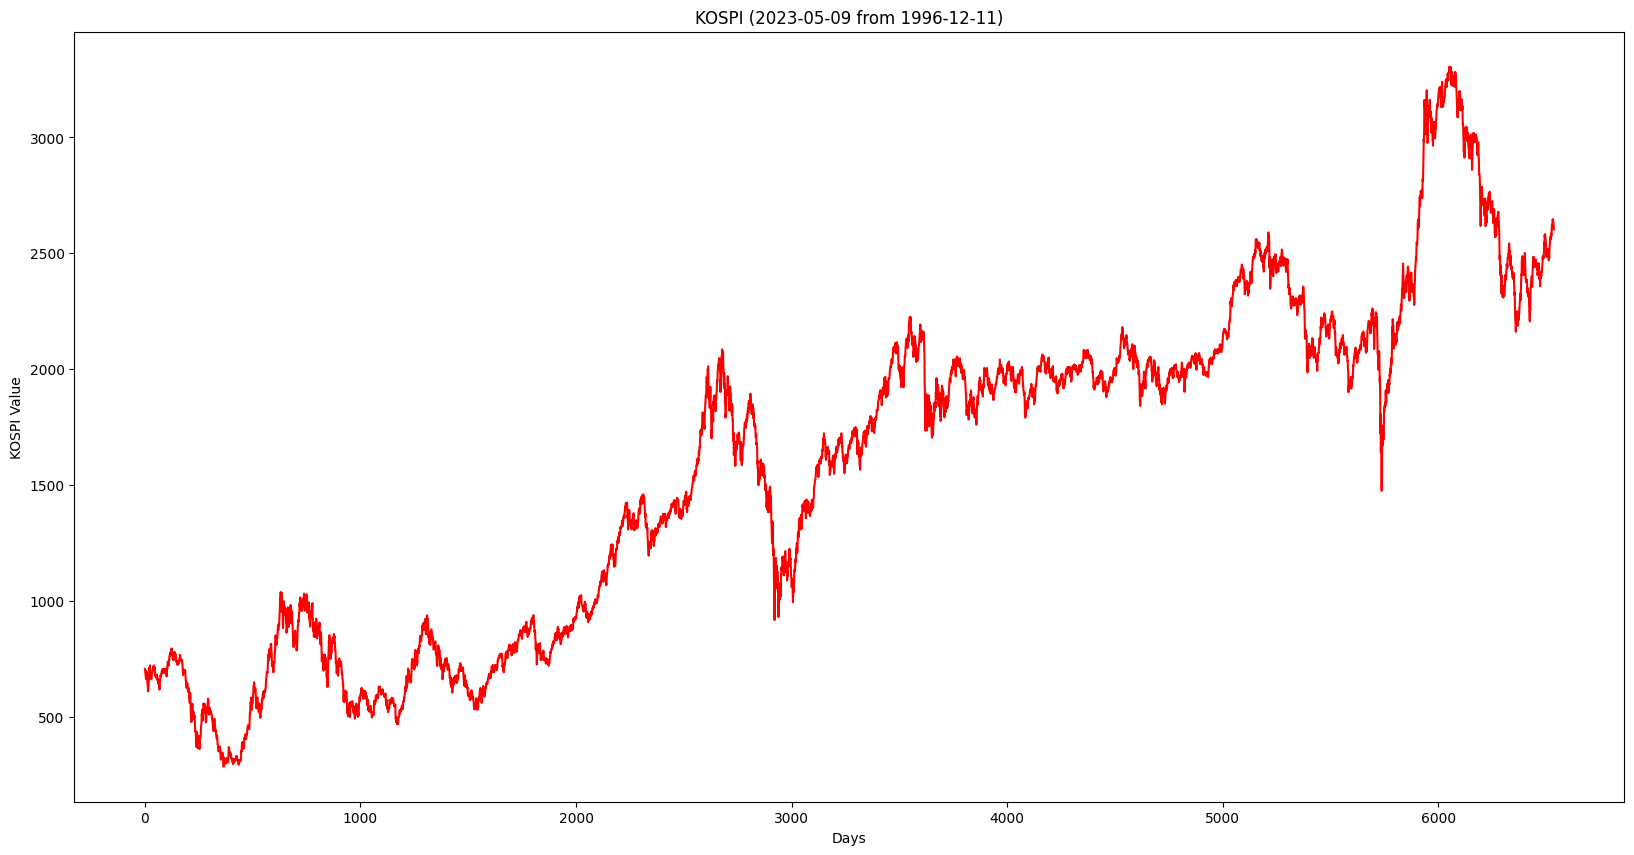

In [7]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('KS11.csv','r')
kospi_data = pd.read_csv(f,header=0)
kospi_data = kospi_data.dropna()     #drop all rows that have any NaN values
seq = kospi_data[['Open', 'High', 'Low', 'Close']].to_numpy()
data_length = len(seq)
print('data length:', data_length)
print('The first 20 data:\n', seq[:20])

# plotting
plt.figure(figsize=(20,10))
plt.plot(seq[:,0],color='red')
plt.title('KOSPI (2023-05-09 from 1996-12-11)')
plt.xlabel('Days')
plt.ylabel('KOSPI Value')
plt.show()

### Split the Dataset

In [8]:
import numpy as np

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = (seq[i + window + horizon - 1])
    X.append(x); Y.append(y)

  return np.array(X), np.array(Y)

w = 7 # a week
#w = 30 # a month
#w = 90 # three months
h = 1

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(6530, 7, 4) (6530, 4)
[[705.98999  709.47998  704.429993 704.679993]
 [705.109985 706.01001  688.73999  689.380005]
 [690.440002 695.719971 677.640015 689.070007]
 [686.969971 686.969971 667.710022 673.919983]
 [675.349976 680.090027 660.390015 663.349976]
 [662.070007 671.429993 655.469971 661.390015]
 [668.130005 690.969971 668.130005 690.969971]] [695.330017 703.51001  692.469971 700.869995]


In [9]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)
# Train
#X_train = X[:split_train]; y_train=Y[:split_train]
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, [0]]
# Valid
#X_valid = X[split_train:split_valid]; y_valid=Y[split_train:split_valid]
X_valid = X[split_train:split_valid,:, [0]]; y_valid=Y[split_train:split_valid,[0]]
# Test
#X_test = X[split_valid:]; y_test=Y[split_valid:]
X_test = X[split_valid:,:, [0]]; y_test=Y[split_valid:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4571, 7, 1) (4571, 1)
(1306, 7, 1) (1306, 1)
(653, 7, 1) (653, 1)


##2. Using a Simple RNNs

In [ ]:
import tensorflow as tf
from tensorflow import keras

#https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
# Args
#return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
#  True, it will output all the hidden states of each time steps.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(128, activation='relu', return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 128)         16640     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
143/143 [==============================] - 4s 12ms/step - loss: 66049.9844 - val_loss: 1157.1785
Epoch 2/200
143/143 [==============================] - 1s 9ms/step - loss: 752.5067 - val_loss: 1033.5319
Epoch 3/200
143/143 [==============================] - 1s 8ms/step - loss: 704.4210 - val_loss: 932.5

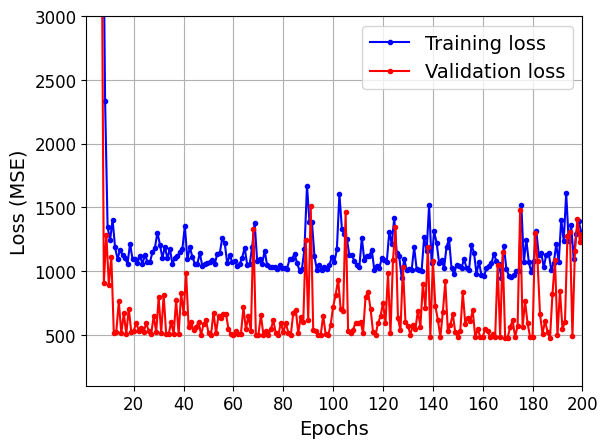

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
#plt.axis([1, 200, 500, 3000])
plt.show()

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 33ms/step - loss: 1276.0249


35.721490763177144

(48, 7, 1)


2/2 [==============================] - 0s 6ms/step
(48, 1)
gt: [2380.]
pred: [2343.5073]


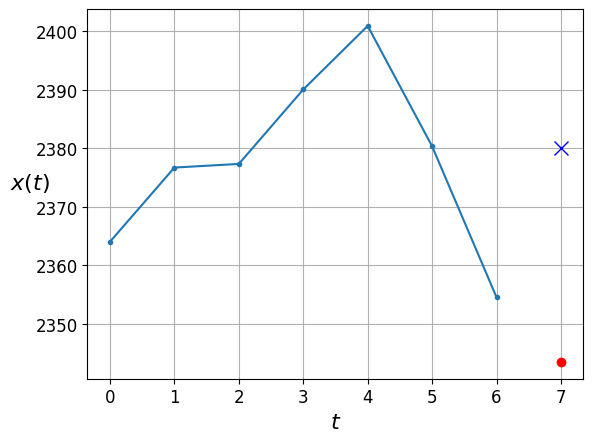

In [ ]:
#n_steps = 30
n_steps = 7

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##3. LSTMs

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
6/6 [==============================] - 3s 72ms/step - loss: 6300523.0000 - val_loss: 5801286.5000
Epoch 2/200
6/6 [==============================] - 0s 25ms/step - loss: 5140149.0000 - val_loss: 4332254.5000
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 3623528.0000 - val_loss: 1976066.0000
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 1062953.6250 - val_loss: 4403.4878
Epoch 5/200
6/6 [==============================] - 0s 24ms/step - loss: 241715.1406 - val_loss: 25235.4629
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 54587.3945 - val_loss: 24805.4473
Epoch 7/200
6/6 [==============================] - 0s 24ms/step - loss: 8002.2573 - val_loss: 4549.0391
Epoch 8/200
6/6 [==============================] - 0s 24ms/step - loss: 51216.0938 - val_loss: 32972.1836
Epoch 9/200
6/6 [==============================] - 0s 23ms/step - loss: 66170.8594 - val_loss: 99121.2422
Epoch 10/200
6/6 [================

In [ ]:
import math
eval = model.evaluate(X_test, y_test)

math.sqrt(eval)

1/1 [==============================] - 0s 98ms/step - loss: 1680.8890


40.998646783594424

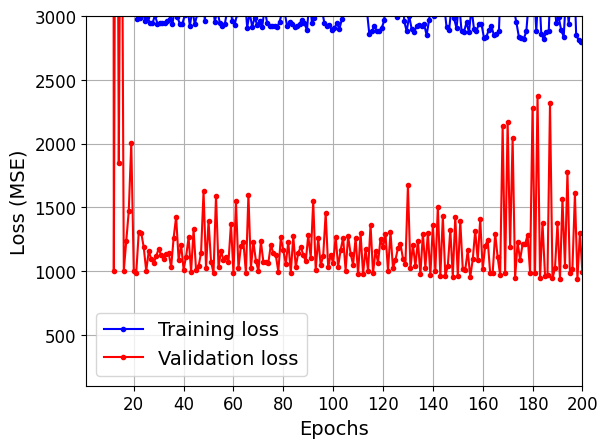

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(48, 7, 1)
2/2 [==============================] - 0s 9ms/step
(48, 1)
gt: [2380.]
pred: [2375.2144]


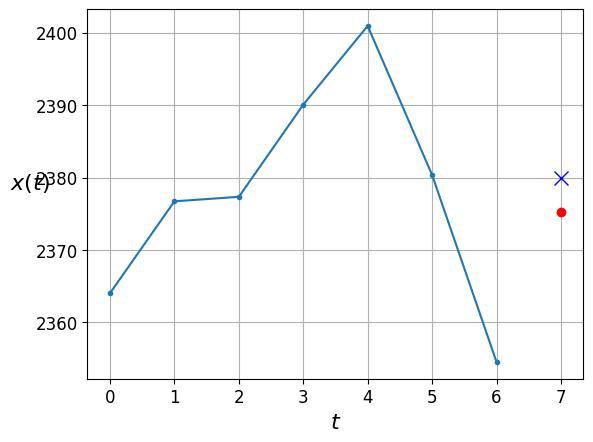

In [ ]:
#n_steps = 30
n_steps = 7

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting Several Steps Ahead

In [ ]:
def seq2dataset_long(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = seq[i + window:i + window + horizon]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w = 30
h = 7

X, Y = seq2dataset_long(seq,w,h)
print(X.shape, Y.shape)
#print(X[0], Y[0])

# Split the dataset
split_train = int(len(X)*0.8)

# Train
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :, [0]]
# Valid
X_valid = X[split_train:,:, [0]]; y_valid=Y[split_train:,:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(212, 30, 4) (212, 7, 4)
(169, 30, 1) (169, 7, 1)
(43, 30, 1) (43, 7, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(7)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
6/6 [==============================] - 2s 119ms/step - loss: 7641768.0000 - val_loss: 6864722.0000
Epoch 2/200
6/6 [==============================] - 1s 93ms/step - loss: 5678240.5000 - val_loss: 5457257.5000
Epoch 3/200
6/6 [==============================] - 1s 98ms/step - loss: 5727461.0000 - val_loss: 5925644.5000
Epoch 4/200
6/6 [==============================] - 1s 88ms/step - loss: 5137298.0000 - val_loss: 5293307.0000
Epoch 5/200
6/6 [==============================] - 1s 101ms/step - loss: 4777394.0000 - val_loss: 4875862.5000
Epoch 6/200
6/6 [==============================] - 1s 98ms/step - loss: 4439048.5000 - val_loss: 5404902.5000
Epoch 7/200
6/6 [==============================] - 0s 61ms/step - loss: 4089201.2500 - val_loss: 4045491.7500
Epoch 8/200
6/6 [==============================] - 0s 50ms/step - loss: 3183187.2500 - val_loss: 3233553.7500
Epoch 9/200
6/6 [==============================] - 0s 50ms/step - loss: 2419359.5000 - val_loss: 2164339.7500
Epoch 10

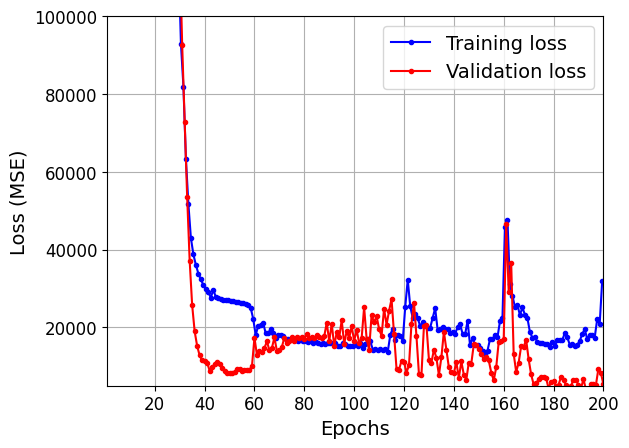

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.axis([1, 200, 5000, 100000])
plt.show()

In [ ]:
print(y_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

(43, 7, 1)


2/2 [==============================] - 0s 17ms/step
(43, 7)


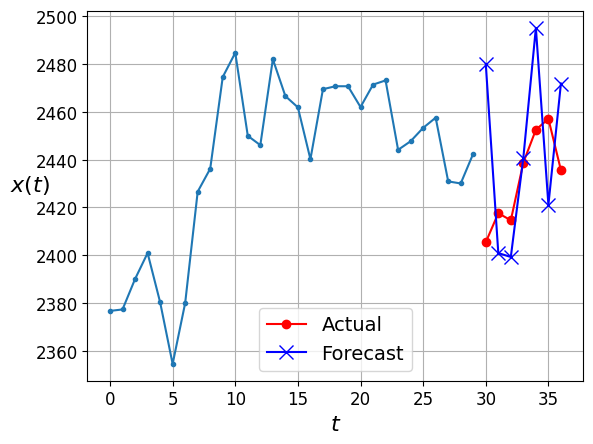

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    #plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(loc='lower center',fontsize=14)

plot_multiple_forecasts(X_valid, y_valid, y_pred)